In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/energy-efficiency')
from lib.util.helper import weekday_time_series
import seaborn as sns
import numpy as np
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
df = weekday_time_series(sensor_id='og_10T')

In [3]:
px.line(
    x=df.index, y=df.kw, 
    title='UV OG - 1st Floor',
    labels={
        'x': 'Time',
        'y': 'kW'
    })

In [4]:
time_int_range = np.arange(0, df.shape[0]*10, 10)
df['t'] = time_int_range
df['t_scaled'] = (df['t'] - df['t'].min()) / (df['t'].max() - df['t'].min())

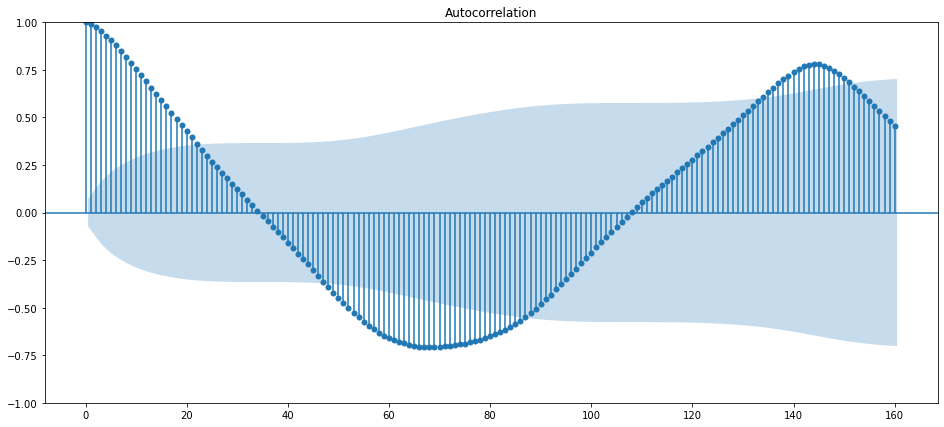

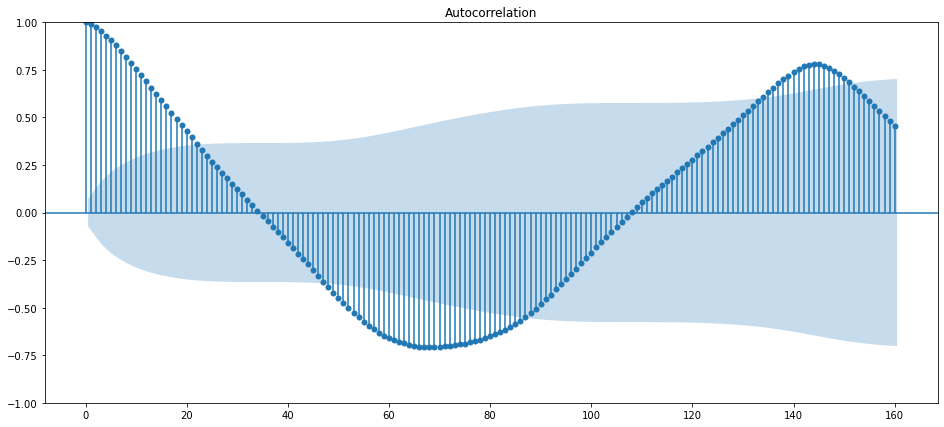

In [5]:
fig, ax = plt.subplots(figsize=(16, 7))
plot_acf(df.kw.values.squeeze(), lags=160, ax=ax)

In [6]:
# Short term interval
df['t_scaled'].iloc[60], df['t_scaled'].iloc[75]

(0.08344923504867872, 0.1043115438108484)

In [7]:
# Long term interval
df['t_scaled'].iloc[140], df['t_scaled'].iloc[150]

(0.19471488178025034, 0.2086230876216968)

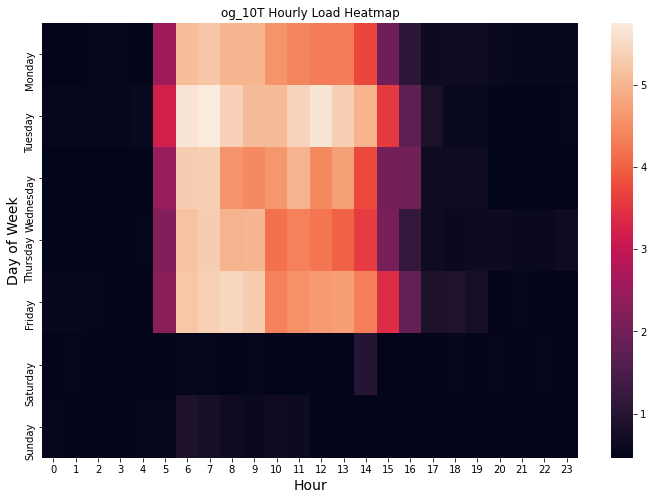

In [9]:
from lib import visualizer
visualizer.hourly_profile_heatmap(machine='og_10T')